Hello! My name is Khaled Ashraf, and I have developed this project to participate in Kaggle's Handwritten Digit Recognition Competition using machine learning and pattern recognition techniques. The objective of this project is to build an efficient and accurate model that can classify digital images of handwritten digits into their corresponding numbers ranging from 0 to 9.

This competition is based on a well-known dataset called the MNIST dataset. It contains images of handwritten digits, where each image is represented by gray-scale pixels with values ranging from 0 to 255. The goal of the model is to accurately identify the correct digit for each image by analyzing the patterns present in the images.

In this project, we used various Python libraries such as pandas, scikit-learn, matplotlib, and seaborn for data analysis and model development. We also utilized unsupervised learning techniques like Principal Component Analysis (PCA) to reduce dimensionality and improve model performance, along with supervised learning like Linear Discriminant Analysis (LDA) for building the classification model.

Summary of the Steps Followed in This Project:
Loading and Processing Data: Loading and processing the data to clean and prepare it for modeling.
Splitting the Data: Dividing the data into training and testing sets with an 80% training and 20% testing ratio.
Normalizing the Data: Normalizing the image data to have values between 0 and 1 to improve model performance.
Dimensionality Reduction with PCA: Using PCA to reduce dimensionality to 200 principal components to decrease complexity and enhance model efficiency.
Training with LDA: Training the Linear Discriminant Analysis (LDA) model on the training data.
Evaluation and Testing: Evaluating the model using the test set and calculating accuracy with a confusion matrix.

#### Import necessary libraries for data manipulation and visualization


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:

# Correct file path to the train.csv file
file_path = '/kaggle/input/digit-recognizer/train.csv'

# Load the CSV file into a DataFrame
mydata = pd.read_csv(file_path)

# Display the first few rows of the data
print(mydata.head(10))


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1      

# Split the data into training and test sets (80% train, 20% test)


In [3]:

X = mydata.iloc[:, 1:]  # All rows, all columns except the first
y = mydata.iloc[:, 0]   # All rows, only the first column (label)

# Split the data into training and test sets (80% train, 20% test)
train_images, test_images, train_labels, test_labels = train_test_split(X, y, train_size=0.8, random_state=0)

# Display the shapes of the split datasets
print(f'Train images shape: {train_images.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test labels shape: {test_labels.shape}')

## normalize data ##


#normalize data
train = train_images / 255
test = test_images / 255


Train images shape: (33600, 784)
Test images shape: (8400, 784)
Train labels shape: (33600,)
Test labels shape: (8400,)


# Apply PCA (Principal Component Analysis) to reduce dimensionality of data


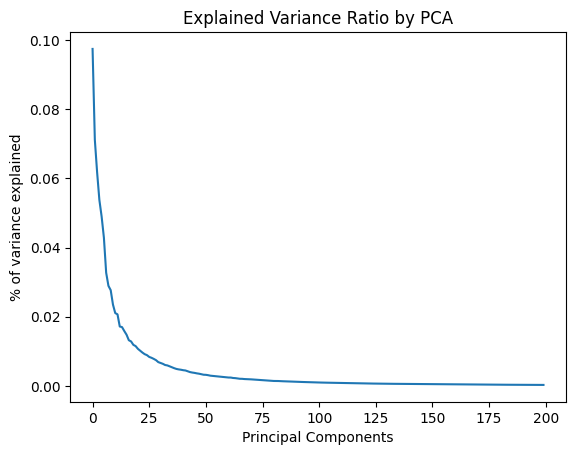

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA decomposition
pca = PCA(n_components=200)  # Finds first 200 PCs
pca.fit(train)

# رسم النسبة المئوية للتباين المفسر
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by PCA')
plt.show()


In [5]:
#----------------------------------------------------

#----------------------------------------------------
#Applying PCAModel Model 

'''
sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False,svd_solver='auto’, tol=0.0,
                          iterated_power='auto’, random_state=None)
'''

PCAModel = PCA(n_components=40, svd_solver='auto')#it can be full,arpack,randomized
PCAModel.fit(train)
PCAModel.fit(test)

#Calculating Details
print('PCAModel Train Score is : ' , PCAModel.score(train))
print('PCAModel Test Score is : ' , PCAModel.score(test))
#print('PCAModel No. of components is : ' , PCAModel.components_)
#print('PCAModel Explained Variance is : ' , PCAModel.explained_variance_)
#print('PCAModel Explained Variance ratio is : ' , PCAModel.explained_variance_ratio_)
#print('PCAModel singular value is : ' , PCAModel.singular_values_)
#print('PCAModel mean is : ' , PCAModel.mean_)
#print('PCAModel noise variance is : ' , PCAModel.noise_variance_)


PCAModel Train Score is :  450.6080635243328
PCAModel Test Score is :  457.19788629102584


### Applying LDA Model 


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#----------------------------------------------------

#----------------------------------------------------
#Applying LDA Model 

'''
sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd’,shrinkage=None,priors=None,
                                                         n_components=None,store_covariance=False,tol=0.0001)
'''

LDAModel = LinearDiscriminantAnalysis(n_components=3,solver='svd',tol=0.0001)
LDAModel.fit(train,train_labels)

#Calculating Details
print('LDAModel Train Score is : ' , LDAModel.score(train, train_labels))
print('LDAModel Test Score is : ' , LDAModel.score(test, test_labels))
#print('LDAModel means are : ' , LDAModel.means_)
#print('LDAModel classea are : ' , LDAModel.classes_)
#print('----------------------------------------------------')

#Calculating Prediction
#y_pred = LDAModel.predict(test_labels)
#y_pred_prob = LDAModel.predict_proba(test_labels)
#print('Predicted Value for LDAModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for LDAModel is : ' , y_pred_prob[:10])

LDAModel Train Score is :  0.8760119047619047
LDAModel Test Score is :  0.8685714285714285



Final Accuracy of the model is:  0.8685714285714285


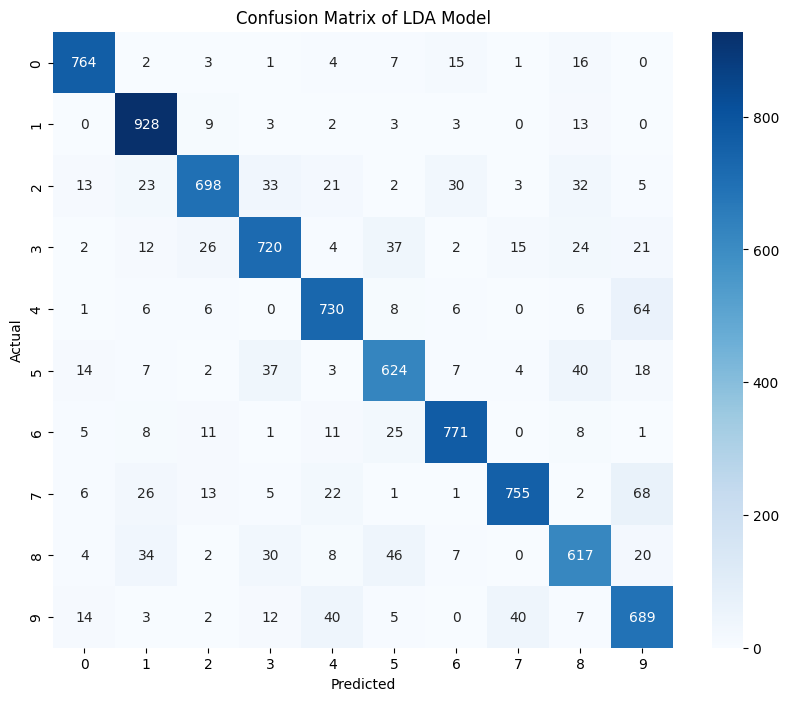

In [7]:
# Use the LDA model to predict test data and calculate accuracy
y_pred = LDAModel.predict(test)

# Calculate accuracy of the model
accuracy = accuracy_score(test_labels, y_pred)
print('\nFinal Accuracy of the model is: ', accuracy)

# Visualize the accuracy results with a confusion matrix
conf_mat = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of LDA Model')
plt.show()


In [8]:
# -----------------------------------------------------------
# Prepare Submission File for Kaggle Competition
# -----------------------------------------------------------

# If you have a Kaggle test dataset, uncomment and adjust the path
# test_kaggle = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Assuming the test images are provided as input for submission
test_kaggle = test_images.copy()  # Replace with actual Kaggle test dataset if available

# Normalize Kaggle test data
test_kaggle_normalized = test_kaggle / 255.0

# Predict labels for the Kaggle test dataset using LDA model
predictions = LDAModel.predict(test_kaggle_normalized)

# Create a submission DataFrame with ImageId and Label columns
submission_df = pd.DataFrame({
    "ImageId": np.arange(1, len(predictions) + 1),  # ImageId starts from 1
    "Label": predictions
})

# Save the submission file as CSV
submission_df.to_csv('submission.csv', index=False)
print("\nSubmission file 'submission.csv' created successfully.")


Submission file 'submission.csv' created successfully.
